<a href="https://colab.research.google.com/github/ArtfulMonster/Machine-Learning/blob/main/Homework_1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D3.csv")

# Display the first 5 rows of the DataFrame
print(data.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [76]:

# Seperate input columns and output column

# Separate columns
x1 = data.values[:, 0]  # get input values from first three columns
x2 = data.values[:, 1]  # get input values from second column
x3 = data.values[:, 2]  #third column


y = data.values[:, 3]   #fourth column
m = len(x1)  # Number of training examples
n = len(y)  # Number of training examples

# Display first 5 lines and the number of training examples
print('x1 = ', x1[: 5])
print('y = ', y[: 5])
print('m = ', m)
print('n = ', n)

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [77]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [78]:
#reshape x1
X_1 = x1.reshape(m, 1)

#reshape x2
X_2 = x2.reshape(m, 1)

#reshape x3
X_3 = x3.reshape(m, 1)

In [79]:
#Stacking
X_s = np.hstack((X_0, X_1, X_2, X_3))

#creating theta
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [80]:
#create cost computing function

def compute_cost(X_s, y, theta):

  predictions = X_s.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  C = 1 / (2 * m) * np.sum(sqrErrors)
  return C

cost = compute_cost(X_s, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [81]:
#creating gradient descent parameters

def gradient_descent(X_s, y, theta, alpha, iterations):

  m = len(y)  # Number of training examples
  cost_history = np.zeros(iterations)

  for i in range(iterations):
        predictions = X_s.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X_s.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X_s, y, theta)

  return theta, cost_history

In [82]:
theta = [0., 0., 0., 0.]
iterations = 800
alpha = 0.01

theta, cost_history = gradient_descent(X_s, y, theta, alpha, iterations)
print('Final value of theta1 =', theta)
#print('cost_history =', cost_history)

Final value of theta1 = [ 2.97658813 -1.67342608  0.91881878  0.07698162]


'\n# Plot customizations\nplt.rcParams["figure.figsize"] = (10, 6)\nplt.grid(True)\nplt.xlabel(\'Population of City in 10,000s\')\nplt.ylabel(\'Profit in $10,000s\')      # fix labelsssss\nplt.title(\'Linear Regression Fit\')\nplt.legend()\n\n# Show the plot\nplt.show()\n\n'

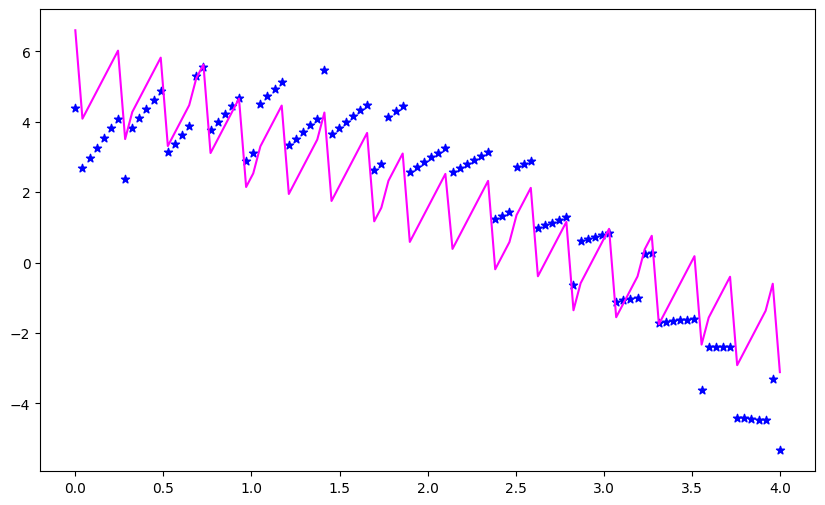

In [83]:
# Scatter plot for the training data
plt.scatter(X_s[:, 1], y, color='blue', marker='*', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_s[:, 1], X_s.dot(theta1), color='magenta', label='Linear Regression')

'''
# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')      # fix labelsssss
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()

'''

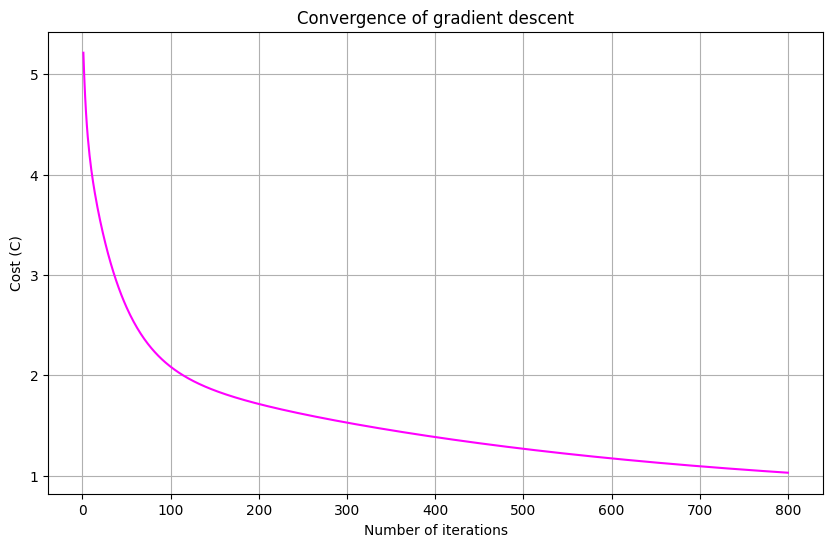

In [84]:
plt.plot(range(1, iterations + 1), cost_history, color='magenta')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (C)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()

In [ ]:
 # predictions
 predictions = X_s.dot(theta)